In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import random
api_key = '2765bd24bf383b91a6fd01c375a583db'

In [24]:
#Generate City list

#Create random list of longitude and latitude
lat_random = []
long_random = []
for rand in range(499):
    lat_random.append(round(random.uniform(-90.0, 91.0),2))
    long_random.append(round(random.uniform(-180.0,181.0),2))

In [ ]:
#Convert the lat and long to city names and append to city_list
city_list = []
for row in range(499):
    city = (citipy.nearest_city(lat_random[row],long_random[row]))
    city_list.append(city.city_name)

In [30]:
#Create a small listi to test
city_small_list = city_list[:5]
city_small_list

['belushya guba', 'narsaq', 'sumbawa', 'longyearbyen', 'naze']

In [67]:

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL in for loops then output Temp, Humidity, Cloudiness, and Wind Speed
city_small_list_agg = []
for index, city in enumerate(city_small_list):
    parameters = f"appid={api_key}&units={units}&q={city}"
    response_json = requests.get(url, params=parameters).json()
    city_small_list_agg.append(response_json)
print(city_small_list_agg)

#Find the index for temp
#city_small_list_agg[1]['main']['temp']

#Find the index for Humidity
#city_small_list_agg[1]['main']['humidity']

#Find the index for Cloudiness
#city_small_list_agg[1]['clouds']['all']

#Find the index for Wind Spped
#city_small_list_agg[1]['wind']['speed']

[{'cod': '404', 'message': 'city not found'}, {'coord': {'lon': -46.05, 'lat': 60.91}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 998, 'humidity': 36, 'temp_min': 46.4, 'temp_max': 46.4}, 'wind': {'speed': 21.92, 'deg': 60, 'gust': 17}, 'clouds': {'all': 20}, 'dt': 1521442200, 'sys': {'type': 1, 'id': 4791, 'message': 0.0038, 'country': 'GL', 'sunrise': 1521450471, 'sunset': 1521494233}, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}, {'cod': '404', 'message': 'city not found'}, {'coord': {'lon': 15.63, 'lat': 78.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 3.2, 'pressure': 1020, 'humidity': 59, 'temp_min': 3.2, 'temp_max': 3.2}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1521442200, 'sys': {'type': 1, 'id': 5326, 'message': 0.0045, 'country': 'NO', 'sunrise': 1

In [68]:
# Build table for Temp, Humidity, Cloudiness, and Wind Speed
cities_test_df = pd.DataFrame()
cities_test_df ['lat'] = ''
cities_test_df ['long'] = ''
cities_test_df ['temp'] = ''
cities_test_df ['humidity'] = ''
cities_test_df ['cloudiness'] = ''
cities_test_df ['wind speed'] = ''

for index, row in enumerate(city_small_list_agg):
    try:
        cities_test_df .loc[index,'lat'] = city_small_list_agg[index]['coord']['lat']   
        cities_test_df .loc[index,'long'] = city_small_list_agg[index]['coord']['lon']   
        cities_test_df .loc[index,'temp'] = city_small_list_agg[index]['main']['temp']
        cities_test_df .loc[index,'humidity'] = city_small_list_agg[index]['main']['humidity']  
        cities_test_df .loc[index,'cloudiness'] = city_small_list_agg[index]['clouds']['all']   
        cities_test_df .loc[index,'wind speed'] = city_small_list_agg[index]['wind']['speed']   
    except:
        continue
            
cities_test_df


,lat,long,temp,humidity,cloudiness,wind speed
1,60.91,-46.05,46.4,36,20,21.92
3,78.22,15.63,3.2,59,20,24.16
4,5.43,7.07,78.8,88,75,4.05


In [69]:
#Full list 
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL in for loops then output Temp, Humidity, Cloudiness, and Wind Speed
city_list_agg = []
for index, city in enumerate(city_list):
    parameters = f"appid={api_key}&units={units}&q={city}"
    response_json = requests.get(url, params=parameters).json()
    city_list_agg.append(response_json)
print(city_list_agg)


[{'cod': '404', 'message': 'city not found'}, {'coord': {'lon': -46.05, 'lat': 60.91}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 998, 'humidity': 36, 'temp_min': 46.4, 'temp_max': 46.4}, 'wind': {'speed': 21.92, 'deg': 60, 'gust': 17}, 'clouds': {'all': 20}, 'dt': 1521442200, 'sys': {'type': 1, 'id': 4791, 'message': 0.0038, 'country': 'GL', 'sunrise': 1521450471, 'sunset': 1521494233}, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}, {'cod': '404', 'message': 'city not found'}, {'coord': {'lon': 15.63, 'lat': 78.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 3.2, 'pressure': 1020, 'humidity': 59, 'temp_min': 3.2, 'temp_max': 3.2}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1521442200, 'sys': {'type': 1, 'id': 5326, 'message': 0.0045, 'country': 'NO', 'sunrise': 1

In [70]:
# Build table for Temp, Humidity, Cloudiness, and Wind Speed
cities_df = pd.DataFrame()
cities_df['lat'] = ''
cities_df['long'] = ''
cities_df['temp'] = ''
cities_df['humidity'] = ''
cities_df['cloudiness'] = ''
cities_df['wind speed'] = ''

for index, row in enumerate(city_list_agg):
    try:
        cities_df.loc[index,'lat'] = city_list_agg[index]['coord']['lat']   
        cities_df.loc[index,'long'] = city_list_agg[index]['coord']['lon']   
        cities_df.loc[index,'temp'] = city_list_agg[index]['main']['temp']
        cities_df.loc[index,'humidity'] = city_list_agg[index]['main']['humidity']  
        cities_df.loc[index,'cloudiness'] = city_list_agg[index]['clouds']['all']   
        cities_df.loc[index,'wind speed'] = city_list_agg[index]['wind']['speed']   
    except:
        continue
cities_df = cities_df.reset_index()
cities_df.head()

,index,lat,long,temp,humidity,cloudiness,wind speed
0,1,60.91,-46.05,46.4,36,20,21.92
1,3,78.22,15.63,3.2,59,20,24.16
2,4,5.43,7.07,78.8,88,75,4.05
3,5,-22.46,-68.93,48.2,49,0,14.99
4,6,-23.58,149.07,91.42,42,0,9.08


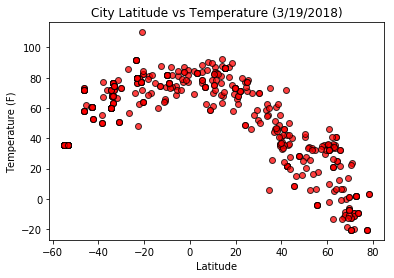

In [88]:
# * Temperature (F) vs. Latitude   
plt.scatter(cities_df['lat'], cities_df['temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Temperature (3/19/2018)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

plt.show()

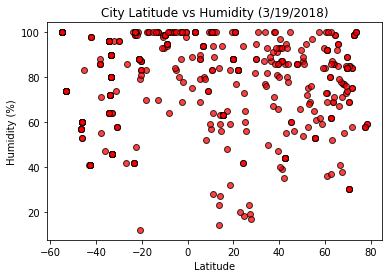

In [87]:
# * Humidity (%) vs. Latitude
plt.scatter(cities_df['lat'], cities_df['humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Humidity (3/19/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show()

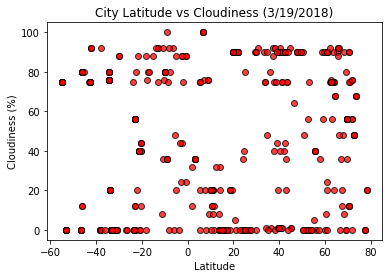

In [86]:
# * Cloudiness (%) vs. Latitude
plt.scatter(cities_df['lat'], cities_df['cloudiness'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Cloudiness (3/19/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.show()

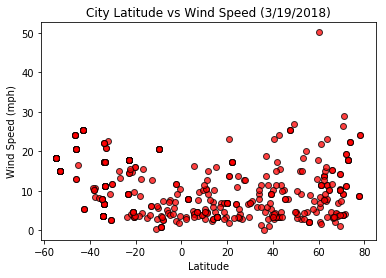

In [85]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(cities_df['lat'], cities_df['wind speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Wind Speed (3/19/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.show()

Insights:
1. The warmer temperature, 80 degrees F and above clusters between -20 and 20 latitude which is near the equator
2. Low humidity o funder 20% is mostly clustered around 20 latitude.
3. Around this time of the year, mid-March, most cities are above 60% in humidty. 